In [403]:
import pyfaidx
from pyfaidx import Fasta
import os
import numpy as np

import matplotlib.pyplot as plt
import random

In [ ]:
# %xdel VAR to release large temp variables in this notebook 

In [2]:
mutpan_root="mutpan/"
file_cluster=mutpan_root+"ClusteringComplete/ClusteringComplete_Samples.txt"

# sample: cluster
clusters = {}

with open(file_cluster) as f:
    for idx, line in enumerate(f):
        if idx > 0:
            try:
                t=line.split("\t")
                sample=t[0].strip()
                entity=t[1].strip()
                cluster_id=t[2].strip()
                
                clusters[sample] = cluster_id
                
            except:
                print(t)
                errors.append(idx)

In [3]:
# how many samples in each cluster? 
reverse_cluster={}
for i in clusters:
    if clusters[i] in reverse_cluster:
        reverse_cluster[clusters[i]]+=1
    else:
        reverse_cluster[clusters[i]] = 1
print(reverse_cluster)

{'0': 89, '1': 440, '2': 40, '3': 11}


### Input for dNDScv

In [4]:
file_maf="Melanoma/MutationsSkin.maf"
out_file="dndS"
# with open(tsv, 'w') as outf:
with open(file_maf) as f:
    for idx, line in enumerate(f):
        if idx > -1:
            t=line.split("\t")
            sample=t[10].strip()

# Get codon positions

In [194]:
# loop through Annotation file
# add pos, nucleotoide, and AA associated with each position

file_annotate="Hg19/AnnotationHg19/Annotation_chr22.txt"
annots=[]
with open(file_annotate) as f:
    for idx, line in enumerate(f):
        if idx > 0:
            t=line.split("\t")
            if len(t) > 3: # has AA info
                pos=t[0]
                nuc=t[1]
                aa= t[3]
                # beyond index 3 are the possible nonsynonymous AA variants 
                aa1=t[5]
                aa2=t[6]
                aa3=t[7].strip()
                
                annots.append([pos, nuc, aa, aa1, aa2, aa3])

### Codon position computation 

For each position, identify its relative codon position (i.e., 1st, 2nd, or 3rd). Using a stack, all positions with the same amino acid are put in the stack. Once the amino acid changes, we know a codon (or string of codons) has ended. We assign each item in the stack a position depending on its index % 3. 

In [195]:
aa_pos={}
# codon_pos, aa, nuc 


stack=[]
curr_aa=""
errs=0
for annot in annots:
    pos=int(annot[0])
    nuc=annot[1]
    aa =annot[2] 
    
    aa1=annot[3]
    aa2=annot[4] 
    aa3=annot[5] 
    
    # very beginning 
    if curr_aa=="":
        curr_aa=aa
        stack.append([pos,aa,nuc, aa1, aa2, aa3])
    # it matches, add to the stack
    elif curr_aa == aa:
        stack.append([pos,aa,nuc, aa1, aa2, aa3])
    # it doesn't match; check stack 
    elif curr_aa != aa:
        num=len(stack)
        if num % 3 == 0:
            for idx in range(num):
                curr=stack.pop()
                aa_pos[curr[0]]=[idx%3, curr[1], curr[2], curr[3], curr[4], curr[5]]
        else: 
            print(stack)
            errs+=1

        # reset everything 
        curr_aa=aa
        stack = []
        stack.append([pos,aa,nuc, aa1, aa2, aa3])

[[17956630, 'R', 'G', 'null', 'null', 'null']]
[[18022692, 'E', 'G', 'null', 'null', 'null']]
[[18027838, 'A', 'C', 'null', 'null', 'null'], [18027839, 'A', 'A', 'null', 'null', 'null']]
[[18121652, 'G', 'G', 'null', 'null', 'null']]
[[18185009, 'D', 'A', 'null', 'null', 'null'], [18185010, 'D', 'T', 'null', 'null', 'null']]
[[18185038, 'N', 'A', 'null', 'null', 'null']]
[[18314867, 'S', 'G', 'S', 'S', 'S'], [18314868, 'S', 'G', 'Y', 'C', 'F'], [18314869, 'S', 'A', 'T', 'A', 'P'], [18314870, 'S', 'A', 'R', 'R', 'S'], [18314871, 'S', 'C', 'I', 'T', 'N'], [18314872, 'S', 'T', 'C', 'R', 'G'], [18314873, 'S', 'A', 'null', 'null', 'null']]
[[18317315, 'R', 'T', 'null', 'null', 'null']]
[[18324588, 'S', 'C', 'null', 'null', 'null'], [18324589, 'S', 'T', 'null', 'null', 'null'], [18324590, 'S', 'G', 'R', 'R', 'S'], [18324591, 'S', 'C', 'I', 'T', 'N'], [18324592, 'S', 'T', 'C', 'R', 'G']]
[[18324782, 'G', 'A', 'null', 'null', 'null'], [18324783, 'G', 'C', 'null', 'null', 'null']]
[[19166093, '

[[32211198, 'D', 'G', 'null', 'null', 'null']]
[[32211402, 'E', 'A', 'null', 'null', 'null'], [32211403, 'E', 'G', 'null', 'null', 'null']]
[[32215008, 'D', 'A', 'null', 'null', 'null'], [32215009, 'D', 'T', 'null', 'null', 'null']]
[[32334098, 'S', 'A', 'S', 'S', 'S'], [32334099, 'S', 'G', 'Y', 'C', 'F'], [32334100, 'S', 'A', 'T', 'A', 'P'], [32334101, 'S', 'G', 'null', 'null', 'null']]
[[32590332, 'V', 'C', 'null', 'null', 'null']]
[[32871110, 'S', 'A', 'null', 'null', 'null'], [32871111, 'S', 'G', 'null', 'null', 'null']]
[[32871385, 'D', 'G', 'null', 'null', 'null']]
[[32874968, 'S', 'T', 'null', 'null', 'null'], [32874969, 'S', 'T', 'T', 'A', 'P'], [32874970, 'S', 'C', 'Y', 'C', 'F'], [32874971, 'S', 'T', 'S', 'S', 'S']]
[[36140251, 'E', 'T', 'null', 'null', 'null']]
[[36146473, 'R', 'C', 'null', 'null', 'null'], [36146474, 'R', 'T', 'null', 'null', 'null']]
[[36556717, 'E', 'C', 'null', 'null', 'null']]
[[36598039, 'W', 'C', 'null', 'null', 'null'], [36598040, 'W', 'A', 'null', '

In [363]:
%xdel annot

# Syn/Nonsyn Lambda Analysis

In [196]:
# read in file of lambdas outputted from mutpan, store in lambdas 

lambdas={}
syns=[]
nonsyns=[]
totals=[]

# chr_pos, syn, nonsyn, total 
file_lambdas="mutpan/lambdas_syn_nonsyn_Skin.txt"
with open(file_lambdas) as f:
    for idx, line in enumerate(f):
        if idx > 0 and line.strip() != "":
            try:
                t=line.split("\t")
                pos=int(t[0].split("_")[1])
                syn=float(t[1])
                nonsyn=float(t[2])
                total=float(t[3])
                
                lambdas[pos] = [syn,nonsyn,total]
                syns.append(syn)
                nonsyns.append(nonsyn)
                totals.append(total)
                

                if round(syn+nonsyn, 5) != round(total,5):
                    print(pos, syn, nonsyn, total)
            except:
                print (line)

In [197]:
len(lambdas)

637807

In [198]:
syn_higher=0
ns_higher=0
for pos in lambdas:
    if lambdas[pos][0] > lambdas[pos][1]:
        syn_higher +=1
    else:
        ns_higher += 1

In [199]:
print(syn_higher, ns_higher)

217882 419925


In [200]:
# pos, aa, nuc, aa1, aa2, aa3
aa_pos[38875748]

[2, 'L', 'C', 'M', 'V', 'L']

## Lambdas and Aa_pos analysis summary 
- Lambdas are taken from ComputeSignifcance.java, where each position in an exon is computed 
- AA_pos are taken from AnnotationsChr, where exons in Hg19 are annotated 

- Missing/discrepancies between the two: 
    - AAs can be missing in regions where codons are incomplete (i.e., ends on a frame of 2 instead of 3), or there are regions missing in the middle of the sequence (amount: 243) 
    - Values in lambdas but not in aa_pos (amount: 2916) 

- Segment lengths 
    - Both AA and Lambda positions have average continuous segments of ~100. This should be enough for looking at 9mers (nonapeptide size). 
   

In [110]:
lol=sorted(aa_pos.keys())
haha=[int(x) for x in lol]

In [201]:
missing=0
for key in lambdas:
    if int(key) not in aa_pos:
        missing+=1
        
print(missing)

2916


In [202]:
segments=[]
counter=0
prev=haha[0]
for i in haha:
    if prev+1==i and prev+1 in aa_pos: 
        counter+=1
    else:
        segments.append(counter)
        counter=0
        
    prev = i

In [206]:
haha[1]

16258193

In [203]:
haha[1]==haha[0]+1

True

In [129]:
print(len(aa_pos), len(lambdas))

699189 637807


In [127]:
np.average(segments)

100.14287979701871

(array([44.,  4., 10., 10.,  8.,  4.,  5.,  3.,  1.,  3.,  1.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   0.  ,   33.48,   66.96,  100.44,  133.92,  167.4 ,  200.88,
         234.36,  267.84,  301.32,  334.8 ,  368.28,  401.76,  435.24,
         468.72,  502.2 ,  535.68,  569.16,  602.64,  636.12,  669.6 ,
         703.08,  736.56,  770.04,  803.52,  837.  ,  870.48,  903.96,
         937.44,  970.92, 1004.4 , 1037.88, 1071.36, 1104.84, 1138.32,
        1171.8 , 1205.28, 1238.76, 1272.24, 1305.72, 1339.2 , 1372.68,
        1406.16, 1439.64, 1473.12, 1506.6 , 1540.08, 1573.56, 1607.04,
        1640.52, 1674.  ]),
 <a list of 50 Patch objects>)

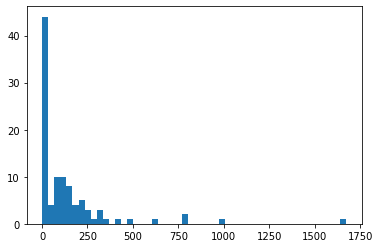

In [128]:
plt.hist(segments[:100],bins=50)

In [143]:
aa_pos[44286993]

[2, 'D', 'G']

In [364]:
%xdel segments

## Get lambda values for nonapeptides

In [209]:
## nonapeptides, 9mers, = 9 x 3 = 27 nucleotides 
## current AA = 1; 4 AAs on each side = 3x4 = 12 nucleotides on each side 

window=12 

exons=sorted(lambdas.keys())

# keyed by position 
# [syn_lambda, ns_lambda, aa_sequence, nuc_sequence]
significance={}
for pos, counter in enumerate(exons):
    if counter%100000==0:
        print(str(counter) +"out of"+ str(len(exons)))
        
    if pos in aa_pos: 

        # AA_POS:  pos-->[codon_pos, aa, nuc]
        # LAMDBAS: pos-->[syn, nonsyn, total]
        curr=aa_pos[pos]
        codon_pos=curr[0]
        aa=curr[1]
        nuc=curr[2]
        start=0
        end=0 

        if codon_pos == 0:
            start = (pos-2)-window
            end   = (pos)+window
        elif codon_pos == 1:
            start = (pos-1)-window
            end   = (pos+1)+window
        elif codon_pos == 2: 
            start = (pos)-window
            end   = (pos+2)+window

        syn_sum = 0
        nonsyn_sum=0
        cur_aa_seq = []
        cur_nuc_seq = []

        aa_counter = 0
        complete = True
        for idx in range(start, end):
            # TODO: to relax constraints, maybe set lambda=0 when DNE? 

            # complete makes sure we only check for continuous positions
            if complete and idx in aa_pos and idx in lambdas:

                _curr      = aa_pos[idx]
                _codon_pos = _curr[0]
                _aa        = _curr[1]
                _nuc       = _curr[2]
                _syn      = lambdas[idx][0]
                _nonsyn   = lambdas[idx][1]

                cur_nuc_seq.append(_nuc)
                syn_sum += _syn 
                nonsyn_sum += _nonsyn

                # only add the aa to sequence every 3 steps 
                if aa_counter % 3==0: 
                    cur_aa_seq.append(_aa)
                aa_counter+=1
            else: 
                complete = False 
        # store in significance{} if complete! 
        if complete: 
            aa_seq=""
            nuc_seq=""
            a=len(cur_aa_seq)
            n=len(cur_nuc_seq)
            for i in range(a):
                aa_seq+=cur_aa_seq.pop()

            for i in range(n):
                nuc_seq+=cur_nuc_seq.pop()

            significance[pos] = [syn_sum, nonsyn_sum, aa_seq, nuc_seq]

### Identify regions where lambda_ns > lambda_s

In [527]:
# significance [pos]: 
# syn, nonsyn, aa, nuc

potentials=[]
diff=[]
for key in significance:
    value= significance[key]
    
    # get values that have a value greater than the average difference
    # between lambda_ns and lambda_s values 
    if value[0]-value[1] > 17:
        potentials.append([key, value[0], value[1], value[2], value[3]])
    #get difference 
    if value[0] > value[1]:
        diff.append(value[0]-value[1])

In [393]:
len(significance)

537510

Text(0.5, 0, 'lambda_syn - lambda_ns')

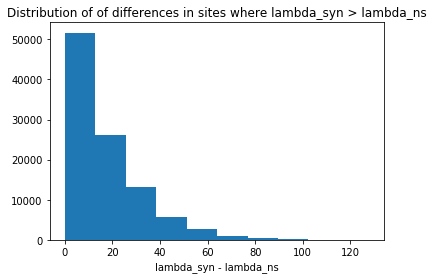

In [533]:
plt.title("Distribution of of differences in sites where lambda_syn > lambda_ns")
plt.hist(diff)
plt.xlabel("lambda_syn - lambda_ns")

### CONTROLS: get values where ns > syn 

In [529]:
# get this many random samples of NS>SYN for control
len(potentials)

38613

In [530]:
ns_greater=0
sy_greater=0
for key in significance:
    value= significance[key]
    
    if value[0] > value[1]:
        sy_greater+=1
    elif value[1] > value[0]:
        ns_greater+=1
print(sy_greater, ns_greater)

101109 436401


In [412]:
# significance [pos]: 
# syn, nonsyn, aa, nuc

temp=[]
for key in significance:
    value= significance[key]

    if value[1] > value[0] or value[1] == value[0]:
        temp.append(key)
        
t=random.sample(temp, len(potentials))
        
controls=[]
for pos in t: 
    value= significance[pos]
    controls.append([pos, value[0], value[1], value[2], value[3]])


In [253]:
print("average difference between lambda_ns and lambda_s: ")
print(np.average(diff))

average difference between lambda_ns and lambda_s: 
17.057099419911054


In [531]:
# significance [pos]: 
# syn, nonsyn, aa, nuc

diff_ns=[]
for key in significance:
    value= significance[key]
    
    # get values that have a value greater than the average difference
    # between lambda_ns and lambda_s values 
    if value[1] > value[0]:
        diff_ns.append(value[1]-value[0])

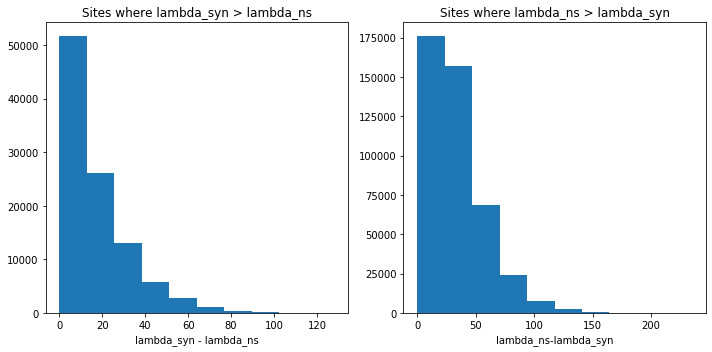

In [536]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(diff)
plt.title("Sites where lambda_syn > lambda_ns")
plt.xlabel("lambda_syn - lambda_ns")



plt.subplot(1, 2, 2)
plt.hist(diff_ns)
plt.title("Sites where lambda_ns > lambda_syn")
plt.xlabel("lambda_ns-lambda_syn")
plt.tight_layout()
plt.show()





In [537]:
# get general distr. of lambda values

# significance [pos]: 
# syn, nonsyn, aa, nuc

s=[]
ns=[]
for key in significance:
    value= significance[key]
    s.append(value[0])
    ns.append(value[1])

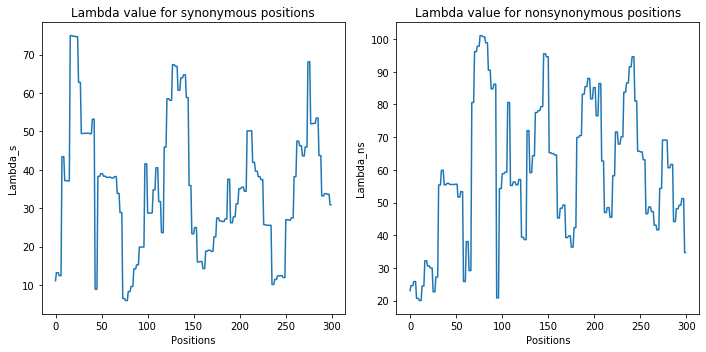

In [547]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(s[500:800])
plt.title("Lambda value for synonymous positions")
plt.ylabel("Lambda_s")
plt.xlabel("Positions")


plt.subplot(1, 2, 2)
plt.plot(ns[500:800])
plt.title("Lambda value for nonsynonymous positions")
plt.ylabel("Lambda_ns")
plt.xlabel("Positions")
plt.tight_layout()
plt.show()





### Get possible mutated nonapeptides per region 

Looking at the center peptide, what are its variants? 
Generate all (max of 9) mutated peptides, and check value through netMHC

In [416]:
def get_neoantigens(potentials, file_out):
    # nucleotide key, possible aa's values
    # neoantigens[key][0] is always the "current" value
    neoantigens={}
    for idx, arr in enumerate(potentials):
        pos=arr[0]
        syn=arr[1]
        nsyn=arr[2]
        aa =arr[3]
        nuc=arr[4]

        neoantigens[pos] = [potentials[idx][3]]
        for mut in aa_pos[pos][2:5]:
            mutated_peptide=potentials[idx][3][:4]+mut+potentials[idx][3][5:]
            if mutated_peptide not in neoantigens[pos]:
                neoantigens[pos].append(mutated_peptide)
                
    # file_out='neoantigens.fasta'
    with open(file_out, 'w') as outf:
        for pos in neoantigens:
            # if there is only one, then there are no possible 
            # NS mutations at that codon pos
            if len(neoantigens[pos]) > 1:
                outf.write(">" + str(pos)+"_org\n")
                outf.write(neoantigens[pos][0] + "\n")
                for pep in neoantigens[pos][1:]:
                    outf.write(">"+str(pos)+"_mut\n")
                    outf.write(pep + "\n")

In [466]:
get_neoantigens(controls, 'controls.fasta')

## Analyze NetMHC-4.0 output

Number of columns: 
- 15: labels 
- 14: values when NOT strong/weak bind 
- 16: values when strong or weak bind (extra '=>' at index 14)
- 18: English text explaining findings 

NetMHC-4.0 info:
- Affinity Threshold for Strong binding peptides  50.000
- Affinity Threshold for Weak binding peptides 500.000
- Rank Threshold for Strong binding peptides   0.500
- Rank Threshold for Weak binding peptides   2.000

In [459]:
# pos          
# HLA         
# peptide          2
# Identity        10
# 1-log50k(aff)   11
# Affinity(nM)    12
# %Rank           13  
# BindLevel       14, 15
def analyze_mhc(file):
    # dictionary of all netmhc output
    # pos: [peptide, rank, bindlvl]
    binders={}
    with open(file) as f:
        for idx, line in enumerate(f):
            if line[0] not in ["-", "#"] and line.strip() != "":
                line=line.strip()
                t = [x.strip() for x in line.split(' ') if x.strip() != ""]

                # file contains values 
                if len(t) in [14, 16]:
                    peptide  = t[2]
                    ident    = t[10]
                    affinity = float(t[12])
                    rank     = float(t[13])
                    bindlvl  = t[15] if len(t) == 16 else 'NA'

                    # current peptide 
                    if 'org' in ident: 
                        pos=int(ident.split("_")[0])
                        if pos in binders:
                            # if we have repeats, make sure their numbers line up 
                            if binders[pos][1][1] != rank:
                                print("Err: ", pos)
                        else: 
                            binders[pos]=[[peptide, rank, bindlvl, affinity]]

                    # mutated peptide--only add if binding is at least weak or strong!  
                    elif len(t) == 16:
                        pos=int(ident.split("_")[0])
                        if pos in binders:
                            binders[pos].append([peptide, rank, bindlvl, affinity])
                        else: 
                            print("Err: not found", pos)
                            
    rm=[]
    for pos in binders:
        if len(binders[pos])==1:
            rm.append(pos)

    for pos in rm:
        binders.pop(pos)
        
    return binders

In [460]:
def compute_org_vs_mut(binders):
    # how many have mutated > original 
    num_gr_original=0
    # how many are high binding 
    sb={'WB':0,'SB':0,'NA':0}
    o_sb={'WB':0,'SB':0,'NA':0}
    # average binding rank 
    ranks=[]
    o_ranks=[]
    # average binding affinity...NOTE: SMALLER=BETTER (STRONGER BOND)
    aff=[]
    o_affs=[]
    # 0: peptide
    # 1: rank
    # 2: binding lvl
    # 3: affinity
    for pos in binders:
        peps=binders[pos]
        org_rank=peps[0][1]
        added=0
        o_ranks.append(org_rank)
        o_sb[peps[0][2]]+=1
        o_affs.append(peps[0][3])
        for pep in peps[1:]:
            sb[pep[2]]+=1
            ranks.append(pep[1])
            aff.append(pep[3])

        for pep in peps[1:]:
            if pep[1] < org_rank:
                num_gr_original+=1
                break
    print("Number of potentials: ", len(potentials))
    print("Number of binders: ", len(binders))
    print("")
    print("Number mutated peptides > original: ", num_gr_original)
    print("")
    print("Average original rank: ", np.average(o_ranks))
    print("Average mutated rank: ", np.average(ranks))
    print("")
    print("Average original affinity: ", np.average(o_affs))
    print("Average mutated affinity: ", np.average(aff))
    print("")
    print("Binding level counts original: ", o_sb)
    print("Binding level counts mutated: ", sb)

In [471]:
%xdel binders_c
%xdel binders_p

NameError: name 'binders_p' is not defined


In [472]:
binders_ns=analyze_mhc("long_controls.out")
compute_org_vs_mut(binders_ns)

Number of potentials:  38613
Number of binders:  290

Number mutated peptides > original:  215

Average original rank:  1.7176896551724137
Average mutated rank:  0.9284550084889643

Average original affinity:  360.5326206896551
Average mutated affinity:  101.68268251273345

Binding level counts original:  {'WB': 139, 'SB': 85, 'NA': 66}
Binding level counts mutated:  {'WB': 384, 'SB': 205, 'NA': 0}


In [473]:
binders_syn=analyze_mhc("long.out")
compute_org_vs_mut(binders_syn)

Number of potentials:  38613
Number of binders:  1011

Number mutated peptides > original:  731

Average original rank:  1.0824629080118695
Average mutated rank:  0.7841508560851459

Average original affinity:  143.97851632047477
Average mutated affinity:  82.92408144377603

Binding level counts original:  {'WB': 504, 'SB': 358, 'NA': 149}
Binding level counts mutated:  {'WB': 1197, 'SB': 964, 'NA': 0}


In [501]:
# plot difference in syn:nonsyn vs. binding levels 
diffs=[]
min_binding=[]

for pos in binders_syn:
    arr=binders_syn[pos]
    ranks=[]
    # for each mutated peptide
    for i in arr[1:]:
        ranks.append(i[3])
    min_binding.append(min(ranks))
    diffs.append(significance[pos][0]-significance[pos][1])

In [481]:
print(len(diffs), len(min_binding))

1011 1011


Text(0, 0.5, 'Binding Affinity (nM)')

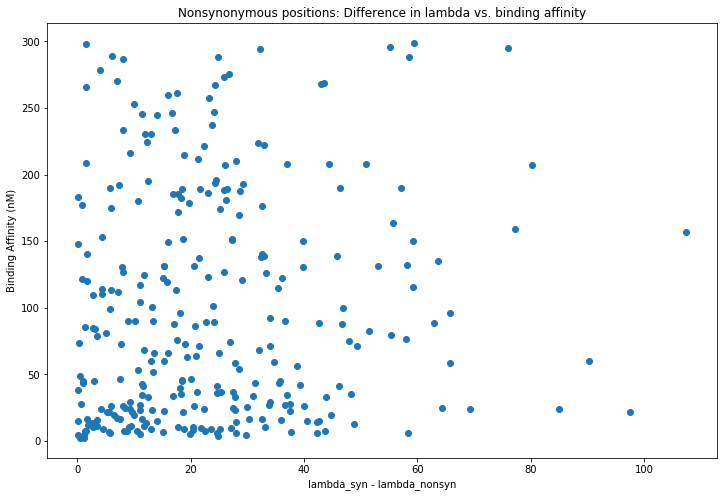

In [498]:
plt.figure(figsize=(12,8))
plt.scatter(diffs, min_binding)
plt.title("Nonsynonymous positions: Difference in lambda vs. binding affinity")
plt.xlabel("lambda_syn - lambda_nonsyn")
plt.ylabel("Binding Affinity (nM)")

Text(0, 0.5, 'Binding Affinity (nM)')

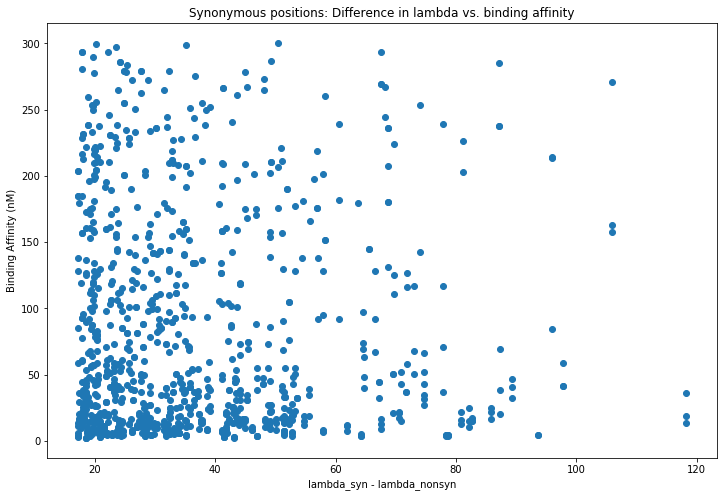

In [502]:
plt.figure(figsize=(12,8))
plt.scatter(diffs, min_binding)
plt.title("Synonymous positions: Difference in lambda vs. binding affinity")
plt.xlabel("lambda_syn - lambda_nonsyn")
plt.ylabel("Binding Affinity (nM)")

In [522]:
# plot difference from original vs mutated
diffs=[]
min_binding=[]

for pos in binders_syn:
    arr=binders_syn[pos]
    ranks=[]
    # for each mutated peptide
    for i in arr[1:]:
        ranks.append(i[1])
    min_binding.append(min(ranks))
    diffs.append(arr[0][1]-min(ranks))

In [523]:
diffs_ns=[]
min_binding=[]

for pos in binders_ns:
    arr=binders_ns[pos]
    ranks=[]
    # for each mutated peptide
    for i in arr[1:]:
        ranks.append(i[1])
    min_binding.append(min(ranks))
    diffs_ns.append(arr[0][1]-min(ranks))

In [524]:
x1=np.arange(len(diffs))
y1=sorted(diffs)

x2=np.arange(len(diffs_ns))
y2=sorted(diffs_ns)

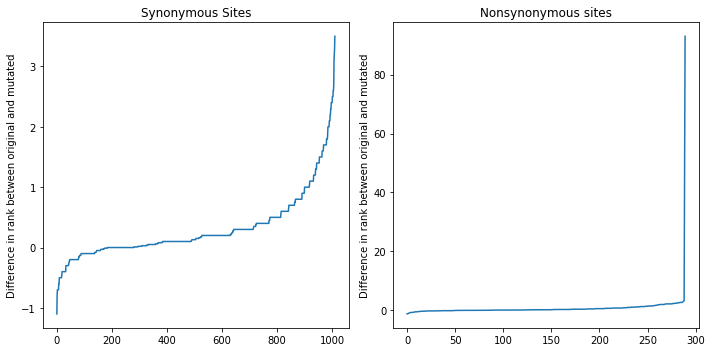

In [525]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(x1, y1)
plt.title('Synonymous Sites')
plt.ylabel('Difference in rank between original and mutated')


plt.subplot(1, 2, 2)
plt.plot(x2, y2)
plt.title('Nonsynonymous sites')
plt.ylabel('Difference in rank between original and mutated')
plt.tight_layout()
plt.show()

# Archive

### Analyze number of mutations per bin size

In [27]:
# HUGO__chr: [start, end, #muts]
genes={}

with open(file_maf) as f:
    for idx, line in enumerate(f):
        if idx > 0:
            try: 
                t=line.split("\t")
                hugo=t[0]
#                 if hugo=='Unknown':
#                     continue
                chrom=t[1]
                start=int(t[2])
                end=int(t[3])
                var_type=t[6]
                ref=t[7]
                alt=t[9]
                
                key=hugo+"_"+chrom
                if key in genes:
                    genes[key][2]+=1
                    # update the start/end pos of the gene if we find another mutation on the same chr
                    if start < genes[key][0]:
                        genes[key][0] = start 
                    elif end > genes[key][1]:
                        genes[key][1] = end 
                else:
                    genes[key] = [start, end, 1]
            except:
                print (line)

In [114]:
gene_lengths=[]
num_muts=[]
num_one=0
for idx, gene in enumerate(genes):
#         print(gene, genes[gene][1]-genes[gene][0], genes[gene][2]) 
        if genes[gene][1]-genes[gene][0] > 0:
            gene_lengths.append(genes[gene][1]-genes[gene][0])
        else: 
            num_one +=1
            gene_lengths.append(1)
        num_muts.append(genes[gene][2])


muts_per_pos=[]
for idx,i in enumerate(gene_lengths):
    muts_per_pos.append(i/num_muts[idx])
print(num_one)

2628


In [105]:
sorted(gene_lengths)[0]

1

In [106]:
s=sorted(muts_per_pos)

In [119]:
for idx, i in enumerate(s):
    if i > 1.0:
        print (idx)
        break

3164


In [109]:
np.average(s)

8478.6977057902

In [123]:
len(s)

22835

(array([6281., 2832., 1862., 1366., 1204.,  883.,  723.,  562.,  448.,
         346.]),
 array([1.50000000e+00, 3.87259091e+02, 7.73018182e+02, 1.15877727e+03,
        1.54453636e+03, 1.93029545e+03, 2.31605455e+03, 2.70181364e+03,
        3.08757273e+03, 3.47333182e+03, 3.85909091e+03]),
 <a list of 10 Patch objects>)

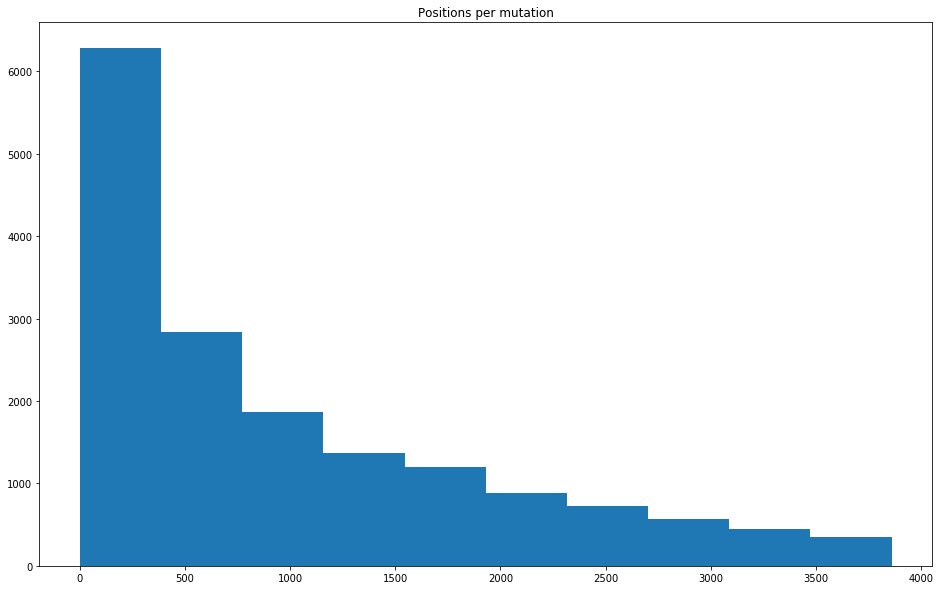

In [127]:
plt.figure(figsize=(16,10))
plt.title("Positions per mutation")
plt.hist(s[3164:len(s)-3164])

(array([56., 21., 11.,  4.,  4.,  0.,  1.,  2.,  0.,  1.]),
 array([  1. ,  43.1,  85.2, 127.3, 169.4, 211.5, 253.6, 295.7, 337.8,
        379.9, 422. ]),
 <a list of 10 Patch objects>)

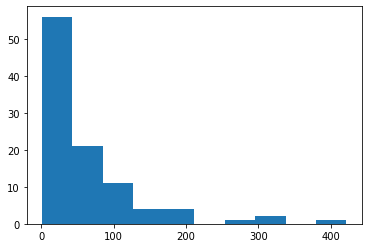

In [36]:
plt.hist(num_muts)

(array([66., 14.,  8.,  2.,  3.,  2.,  2.,  1.,  1.,  1.]),
 array([     0. ,  72175.7, 144351.4, 216527.1, 288702.8, 360878.5,
        433054.2, 505229.9, 577405.6, 649581.3, 721757. ]),
 <a list of 10 Patch objects>)

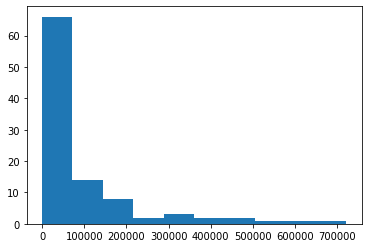

In [35]:
plt.hist(gene_lengths)

### How many mutations within a X position-radius?

-10/+10: 
- average: 1.4 

-50/+50:
- average: 2.15
- median: 1 
- all greater than 1: 
    - average: 3.4
    - median: 3 
    - length: 205455
    
-100/+100
- average: 2.8
- median: 1 


In [172]:
# HUGO__chr: [start, end, #muts]
genes={}

mutation_positions={}
with open(file_maf) as f:
    for idx, line in enumerate(f):
        if idx%50000==0:
            print(idx, " lines computed")
        if idx > 0:
            t=line.split("\t")
            hugo=t[0]
#                 if hugo=='Unknown':
#                     continue
            chrom=t[1]
            start=int(t[2])
            end=int(t[3])
            var_type=t[6]
            ref=t[7]
            alt=t[9]

            x=100
            rang=[start-x,start+x]

            if chrom in mutation_positions:
                mutation_positions[chrom].append(start)
            else:
                mutation_positions[chrom]=[start]

            key=hugo+"_"+chrom


0  lines computed
50000  lines computed
100000  lines computed
150000  lines computed
200000  lines computed
250000  lines computed
300000  lines computed
350000  lines computed
400000  lines computed


In [181]:
hits={}
hits["all"]=[]

for ch in mutation_positions:
    print (ch)
    sorted_positions=sorted(mutation_positions[ch])
    for out_pos in sorted_positions:
        hit=0
        for pos in sorted_positions:
            x=100
            rang=[pos-x, pos+x]
            if rang[0] <= out_pos <= rang[1]:
                hit+=1
            if pos > rang[1]:
                break
                
        hits["all"].append(hit)
        if chrom in hits:
            hits[ch].append(hit)
        else:
            hits[ch] = [hit]

In [190]:
arr=[x for x in hits['all'] if x > 9]

In [191]:
len(arr)

44175

In [192]:
len(arr)/len(hits['all'])

0.1017674242878008

In [193]:
print(np.average(hits['all']), np.median(hits['all']))

4.692032307557628 3.0


(array([2.3264e+04, 1.1354e+04, 3.8660e+03, 2.8420e+03, 9.8000e+02,
        7.7500e+02, 2.7600e+02, 2.4300e+02, 4.5000e+01, 3.2000e+01,
        4.0000e+01, 3.0000e+01, 1.1000e+01, 8.0000e+00, 0.0000e+00,
        0.0000e+00, 7.0000e+00, 0.0000e+00, 5.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.3500e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

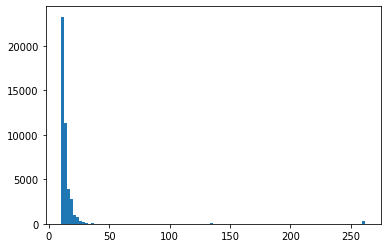

In [194]:
plt.hist(arr,bins=100)